In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataframe = pd.read_csv('train.csv')
dataframe = dataframe.drop(columns=["Loan_ID"])
dataframe.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:
dataframe.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [5]:
len(dataframe)

614

In [6]:
# dataframe.iloc[:, 2] = dataframe.iloc[:, -2]
# dataframe = dataframe.rename(columns = {"Dependents":"Property_Area",  "Property_Area":"Dependents" })
# dataframe.head()

In [7]:
from sklearn.preprocessing import LabelEncoder
cat_features=[x for x in dataframe.columns if dataframe[x].dtype=="object"]
le=LabelEncoder()
for col in cat_features:
    if col in dataframe.columns:
        i = dataframe.columns.get_loc(col)
        dataframe.iloc[:,i] = dataframe.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')
dataframe.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


AxesSubplot(0.125,0.125;0.62x0.755)


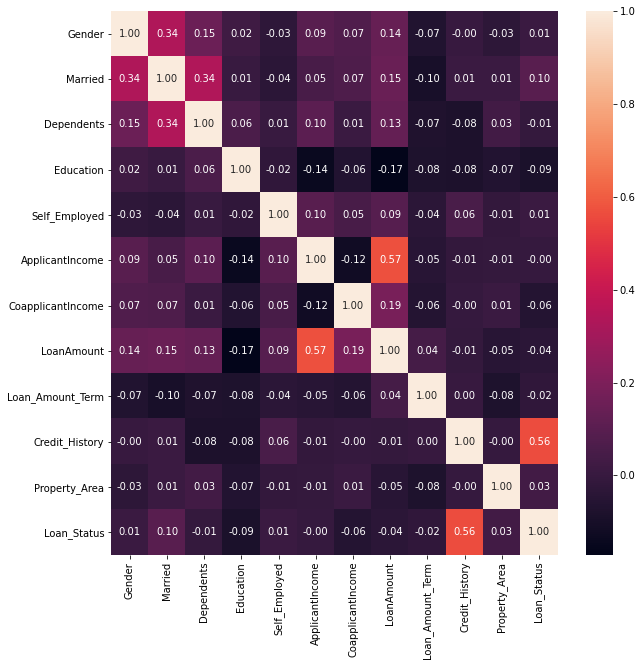

In [8]:
plt.figure(figsize=(10,10))
print(sns.heatmap(dataframe.corr(), annot=True, fmt='.2f'))

In [9]:
dataframe = dataframe.drop(columns = ["LoanAmount"])


In [10]:
dataframe.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,360.0,1.0,2,1


In [11]:
dataframe.isnull().sum().sort_values(ascending = False)

Credit_History       50
Loan_Amount_Term     14
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Dependents            0
Married               0
Gender                0
dtype: int64

In [12]:
X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values

In [13]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit(X)
X = imputer.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
X_train[0]

array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 5.649e+03,
       0.000e+00, 3.600e+02, 1.000e+00, 2.000e+00])

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,5:8] = sc.fit_transform(X_train[:,5:8])
X_test[:,5:8] = sc.transform(X_test[:,5:8])

In [18]:
print(X_train)

[[1.         1.         1.         ... 0.27778225 1.         2.        ]
 [1.         0.         0.         ... 0.27778225 1.         0.        ]
 [1.         0.         2.         ... 0.27778225 1.         0.        ]
 ...
 [1.         1.         3.         ... 0.27778225 1.         1.        ]
 [1.         1.         0.         ... 0.27778225 1.         2.        ]
 [0.         1.         0.         ... 0.27778225 1.         1.        ]]


In [19]:
print(X_test)

[[1.         0.         0.         ... 0.27778225 1.         1.        ]
 [0.         0.         0.         ... 0.27778225 1.         1.        ]
 [1.         1.         0.         ... 0.27778225 1.         2.        ]
 ...
 [1.         1.         0.         ... 0.27778225 1.         2.        ]
 [1.         0.         0.         ... 0.27778225 1.         1.        ]
 [1.         1.         1.         ... 0.27778225 0.         1.        ]]


In [20]:
# def logistic_regression(X_train,X_test,y_train,y_test):
#   from sklearn.linear_model import LogisticRegression
#   from sklearn.metrics import accuracy_score,classification_report
#   LR = LogisticRegression(random_state = 0)
#   LR.fit(X_train,y_train)
#   print("Logistic Regression\n",classification_report(y_test, LR.predict(X_test)),"\n")
#   print(accuracy_score(y_test, LR.predict(X_test)))
#   from sklearn.model_selection import cross_val_score
#   accuracies = cross_val_score(estimator = LR,X = X_train,y = y_train, cv = 15)
#   print("Accuracy: {:.2f}".format(accuracies.mean() * 100))

In [21]:
# logistic_regression(X_train,X_test,y_train,y_test)

In [22]:
ann = tf.keras.models.Sequential()

In [23]:
ann.add(tf.keras.layers.Dense(units =4, activation = 'relu'))

In [24]:

ann.add(tf.keras.layers.Dense(units = 4, activation='relu'))

In [25]:

ann.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [26]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [27]:
ann.fit(X_train, y_train,batch_size = 32, epochs=300)

Epoch 1/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.5283
Epoch 2/300
15/15 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5826
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.6239
Epoch 4/300
15/15 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6543
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6652
Epoch 6/300
15/15 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6696
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6717
Epoch 8/300
15/15 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.6717
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6739
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6783
Epoch 11/

In [28]:
y_pred = []
for predictions in range (len(ann.predict(X_test))):
  y_pred.append(0) if ann.predict(X_test)[predictions]<=0.5 else y_pred.append(1)


In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8571428571428571
[[ 23  20]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.92      0.53      0.68        43
           1       0.84      0.98      0.91       111

    accuracy                           0.86       154
   macro avg       0.88      0.76      0.79       154
weighted avg       0.87      0.86      0.84       154

